In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import matplotlib.dates as md

In [4]:
df=pd.read_csv('monitoring.csv')
df.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",30-01-2024 10:00:00,16.515083,80.518167,CO,17.0,70.0,51.0
1,India,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",30-01-2024 10:00:00,14.675886,77.593027,PM10,45.0,109.0,70.0
2,India,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",30-01-2024 10:00:00,14.675886,77.593027,OZONE,2.0,59.0,26.0
3,India,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",30-01-2024 10:00:00,13.204880,79.097889,NO2,9.0,28.0,14.0
4,India,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",30-01-2024 10:00:00,13.204880,79.097889,SO2,5.0,24.0,10.0


In [5]:
df.drop("country",axis=1,inplace=True)
df.head()

,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",30-01-2024 10:00:00,16.515083,80.518167,CO,17.0,70.0,51.0
1,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",30-01-2024 10:00:00,14.675886,77.593027,PM10,45.0,109.0,70.0
2,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",30-01-2024 10:00:00,14.675886,77.593027,OZONE,2.0,59.0,26.0
3,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",30-01-2024 10:00:00,13.204880,79.097889,NO2,9.0,28.0,14.0
4,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",30-01-2024 10:00:00,13.204880,79.097889,SO2,5.0,24.0,10.0


In [6]:
#finding out the date & time when max. pollution occured at India
max_row = df[df['pollutant_max'] == df['pollutant_max'].max()]
max_time = max_row['last_update'].values[0]
print(f"The maximum pollution occurs at time: {max_time}")

The maximum pollution occurs at time: 30-01-2024 10:00:00


In [7]:
#finding out the details of places when max. pollution occured at India
max_rows= df[df['pollutant_max'] == df['pollutant_max'].max()]

# Print all relevant details for each maximum value
for _, row in max_rows.iterrows():
    print(f"City: {row['city']}")
    print(f"Station: {row['station']}")
    print(f"Date & time: {row['last_update']}")
    print(f"Pollutant Average: {row['pollutant_avg']}")
    print(f"Max Value: {row['pollutant_max']} PPM\n")


City: Byrnihat
Station: Central Academy for SFS, Byrnihat - PCBA
Date & time: 30-01-2024 10:00:00
Pollutant Average: 259.0
Max Value: 500.0 PPM

City: Patna
Station: Samanpura, Patna - BSPCB
Date & time: 30-01-2024 10:00:00
Pollutant Average: 436.0
Max Value: 500.0 PPM

City: Delhi
Station: Jahangirpuri, Delhi - DPCC
Date & time: 30-01-2024 10:00:00
Pollutant Average: 404.0
Max Value: 500.0 PPM

City: Sri Ganganagar
Station: Old City, Sri Ganganagar - RSPCB
Date & time: 30-01-2024 10:00:00
Pollutant Average: 406.0
Max Value: 500.0 PPM

City: Greater Noida
Station: Knowledge Park - V, Greater Noida - UPPCB
Date & time: 30-01-2024 10:00:00
Pollutant Average: 297.0
Max Value: 500.0 PPM

City: Noida
Station: Sector - 125, Noida - UPPCB
Date & time: 30-01-2024 10:00:00
Pollutant Average: 255.0
Max Value: 500.0 PPM

City: Kishanganj
Station: SDM Office_Khagra, Kishanganj - BSPCB
Date & time: 30-01-2024 10:00:00
Pollutant Average: 356.0
Max Value: 500.0 PPM

City: Patna
Station: Samanpura, Pa

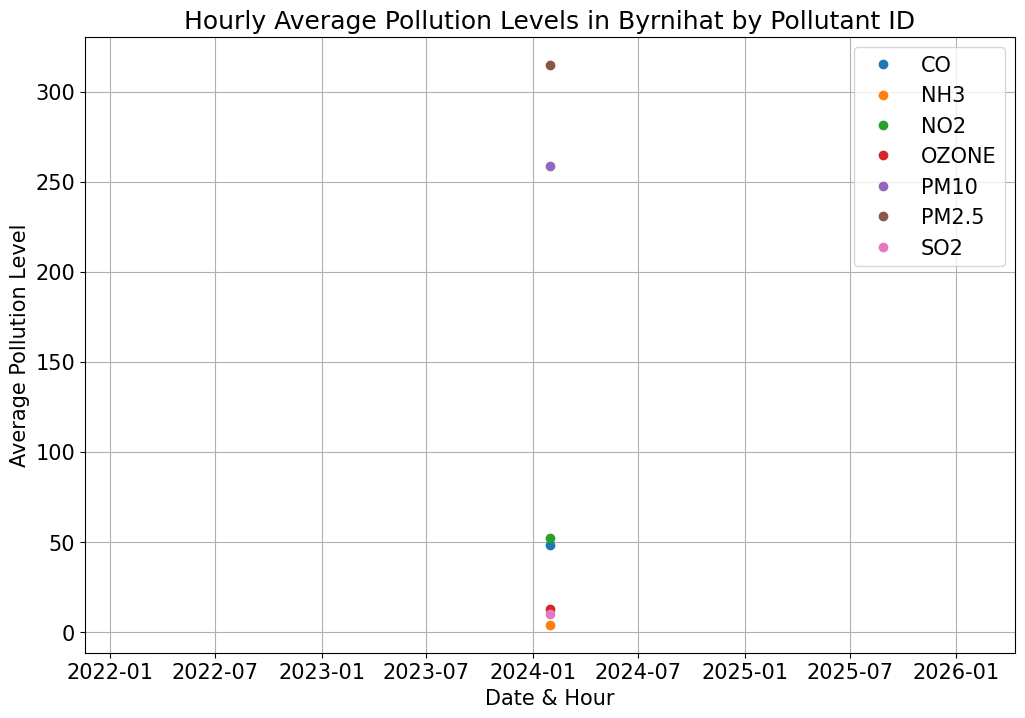

In [37]:
#finding out pollution level at Byrnihat by hourly update
city_df = df[df['city'] == 'Byrnihat']

grouped = city_df.groupby('pollutant_id')

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 15})

for pollutant_id, group in grouped:
    plt.plot(group['last_update'], group['pollutant_avg'], label=pollutant_id, marker='o', linestyle='')

plt.xlabel("Date & Hour")
plt.ylabel("Average Pollution Level")
plt.title(f"Hourly Average Pollution Levels in {'Byrnihat'} by Pollutant ID")
plt.grid(True)
plt.legend()
plt.show()

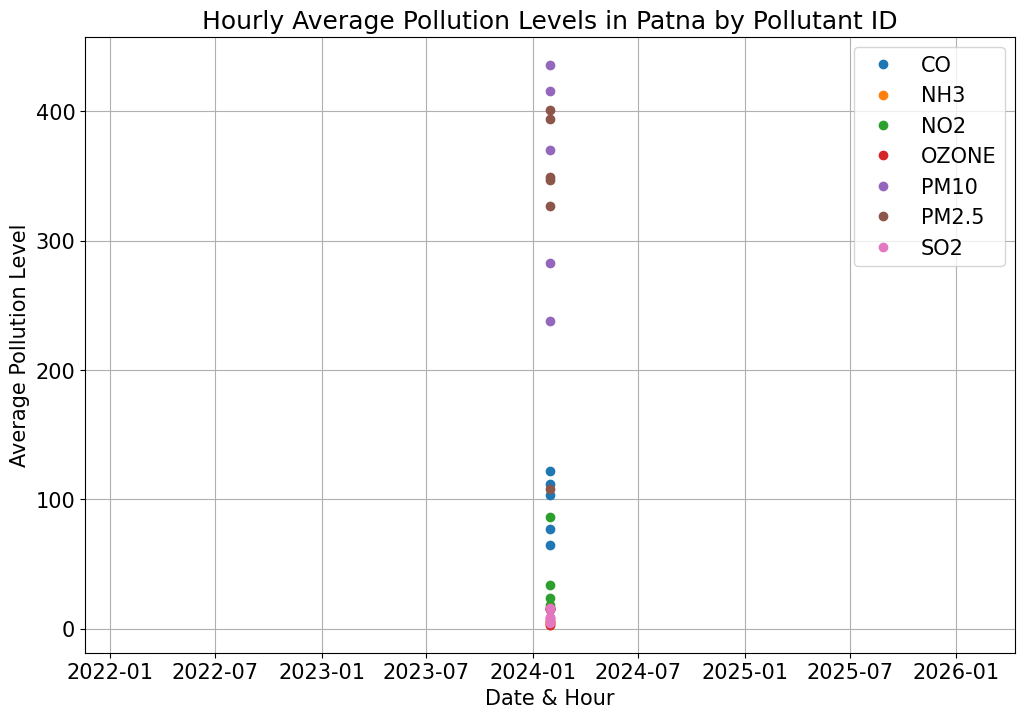

In [38]:
#finding out pollution level at Patna by hourly update
city_df = df[df['city'] == 'Patna']

grouped = city_df.groupby('pollutant_id')

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 15})

for pollutant_id, group in grouped:
    plt.plot(group['last_update'], group['pollutant_avg'], label=pollutant_id, marker='o', linestyle='')

plt.xlabel("Date & Hour")
plt.ylabel("Average Pollution Level")
plt.title(f"Hourly Average Pollution Levels in {'Patna'} by Pollutant ID")
plt.grid(True)
plt.legend()
plt.show()

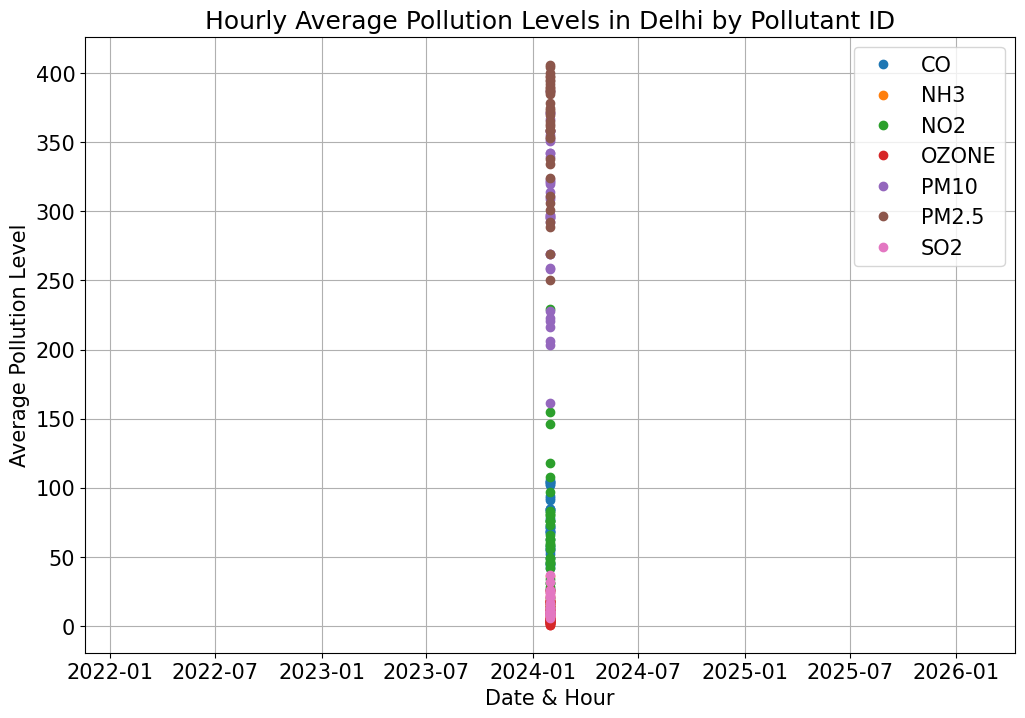

In [39]:
#finding out pollution level at Delhi by hourly update
city_df = df[df['city'] == 'Delhi']

grouped = city_df.groupby('pollutant_id')

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 15})

for pollutant_id, group in grouped:
    plt.plot(group['last_update'], group['pollutant_avg'], label=pollutant_id, marker='o', linestyle='')

plt.xlabel("Date & Hour")
plt.ylabel("Average Pollution Level")
plt.title(f"Hourly Average Pollution Levels in {'Delhi'} by Pollutant ID")
plt.grid(True)
plt.legend()
plt.show()

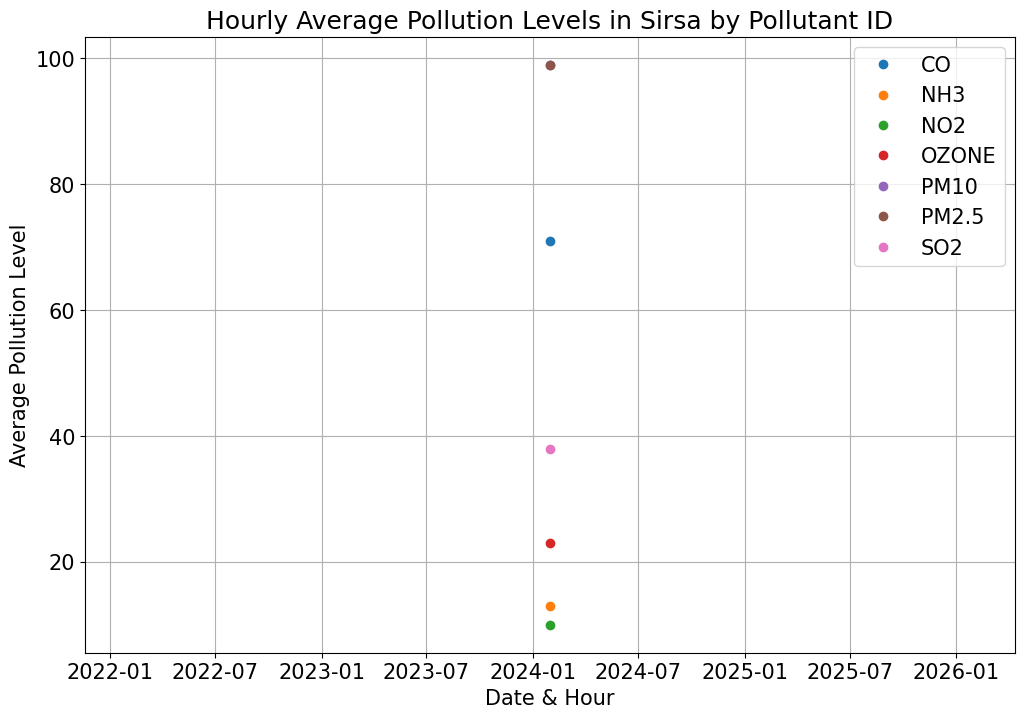

In [40]:
#finding out pollution level at Sirsa by hourly update
city_df = df[df['city'] == 'Sirsa']

grouped = city_df.groupby('pollutant_id')

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 15})

for pollutant_id, group in grouped:
    plt.plot(group['last_update'], group['pollutant_avg'], label=pollutant_id, marker='o', linestyle='')

plt.xlabel("Date & Hour")
plt.ylabel("Average Pollution Level")
plt.title(f"Hourly Average Pollution Levels in {'Sirsa'} by Pollutant ID")
plt.grid(True)
plt.legend()
plt.show()

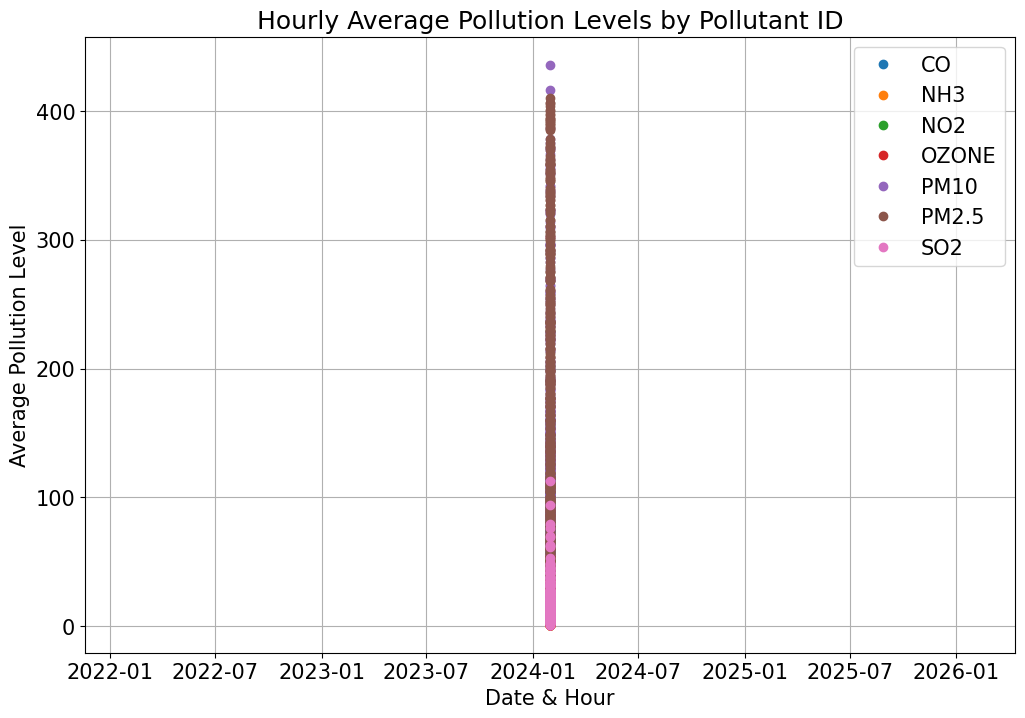

In [41]:
#finding out pollution level all over India by hourly update
grouped = df.groupby('pollutant_id')

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 15})

for pollutant_id, group in grouped:
    plt.plot(group['last_update'], group['pollutant_avg'], label=pollutant_id, marker='o', linestyle='')

plt.xlabel("Date & Hour")
plt.ylabel("Average Pollution Level")
plt.title("Hourly Average Pollution Levels by Pollutant ID")
plt.grid(True)
plt.legend()
plt.show()

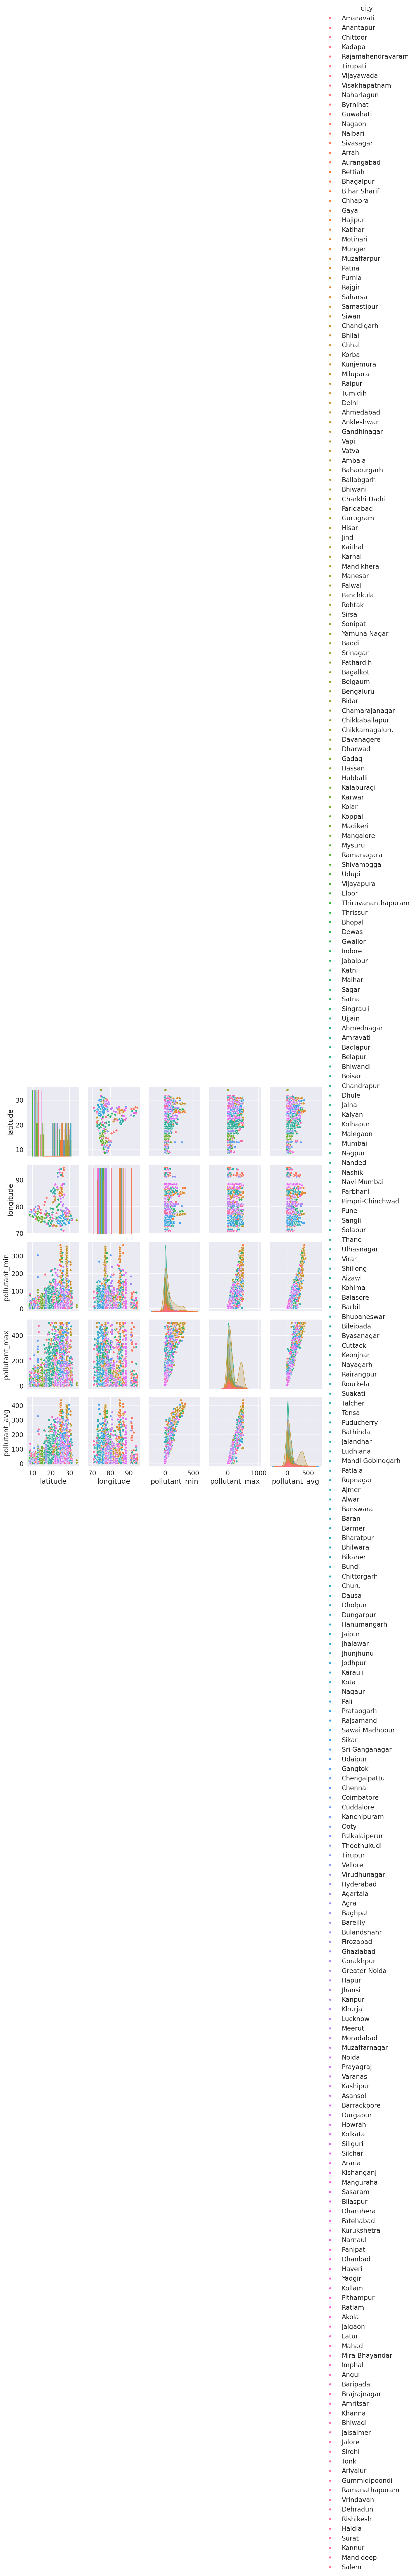

In [43]:
#pairplotting
sns.set(font_scale=1.5)
g = sns.pairplot(df, hue="city")
g.fig.set_size_inches(15, 15)
plt.show()

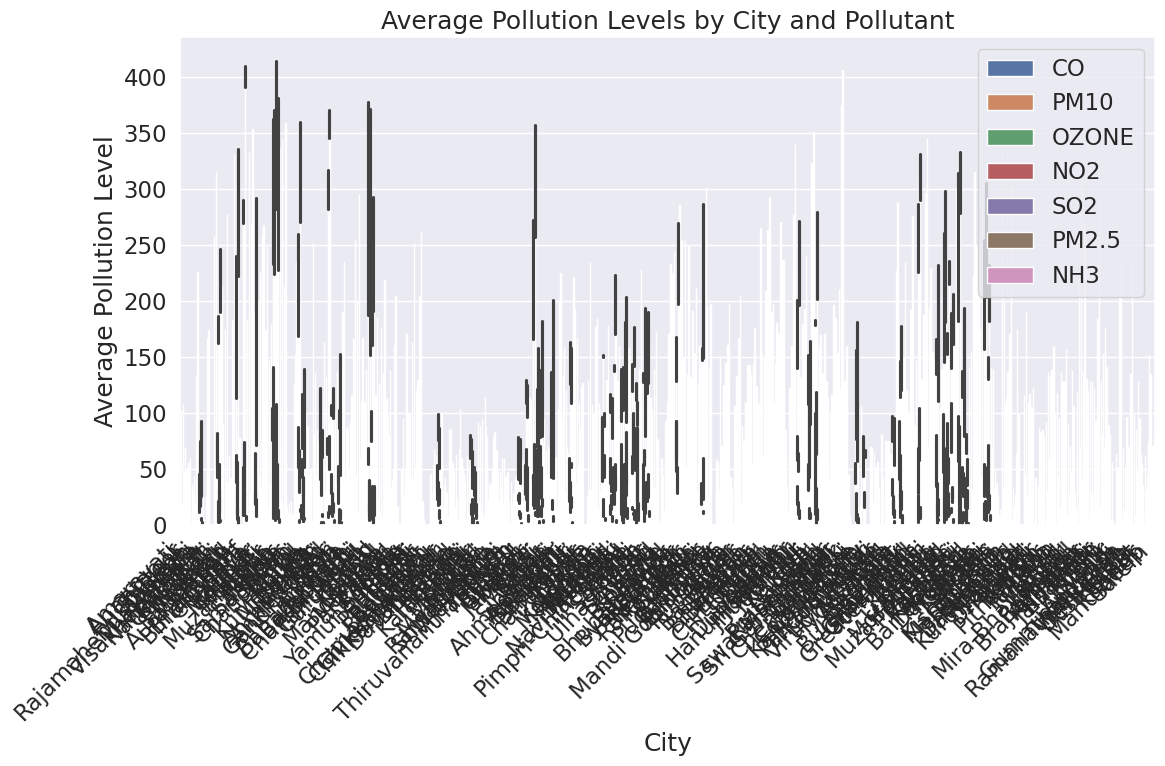

In [45]:
plt.figure(figsize=(12, 8))
sns.barplot(x='city', y='pollutant_avg', hue='pollutant_id', data=df)
plt.xticks(rotation=45, ha='right')
plt.xlabel("City")
plt.ylabel("Average Pollution Level")
plt.title("Average Pollution Levels by City and Pollutant")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

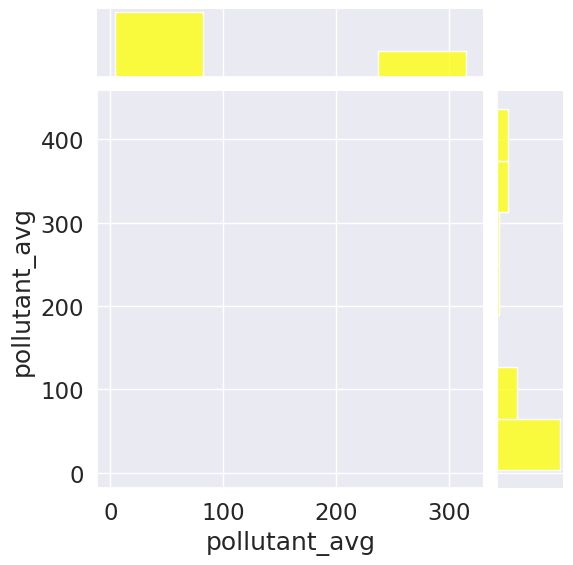

In [48]:
byrnihat_df = df[df['city'] == 'Byrnihat']
patna_df = df[df['city'] == 'Patna']

# Assuming 'pollutant_avg' is the column for average pollution level
sns.jointplot(x=byrnihat_df['pollutant_avg'], y=patna_df['pollutant_avg'], color='yellow')
plt.show()

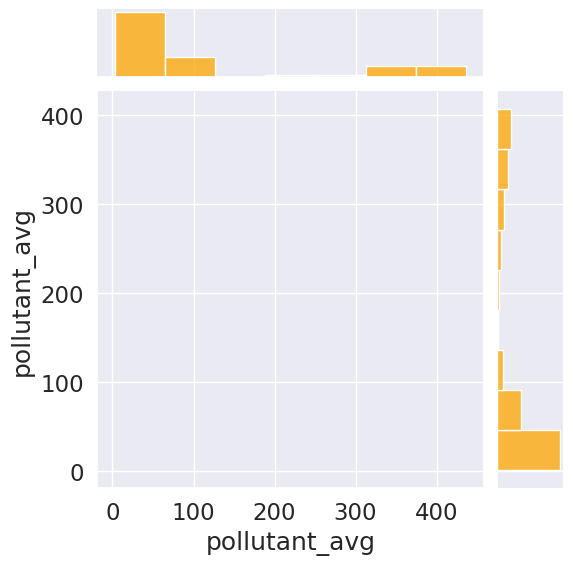

In [50]:
patna_df = df[df['city'] == 'Patna']
delhi_df = df[df['city'] == 'Delhi']

# Assuming 'pollutant_avg' is the column for average pollution level
sns.jointplot(x=patna_df['pollutant_avg'], y=delhi_df['pollutant_avg'], color='orange')
plt.show()

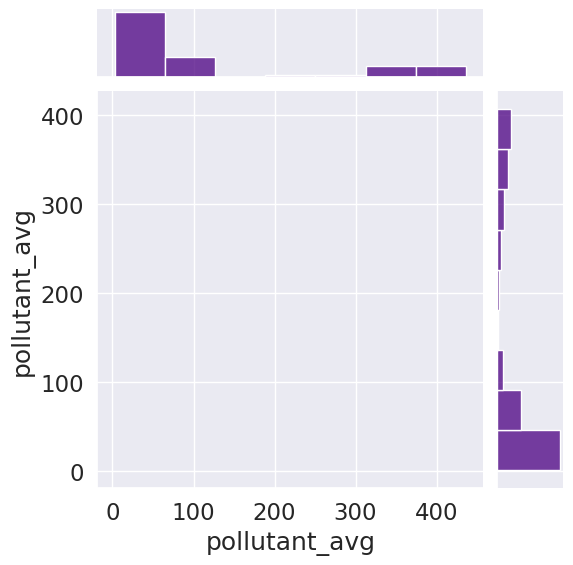

In [54]:
delhi_df = df[df['city'] == 'Delhi']
sirsa_df = df[df['city'] == 'Sirsa']

# Assuming 'pollutant_avg' is the column for average pollution level
sns.jointplot(x=patna_df['pollutant_avg'], y=delhi_df['pollutant_avg'], color='indigo')
plt.show()

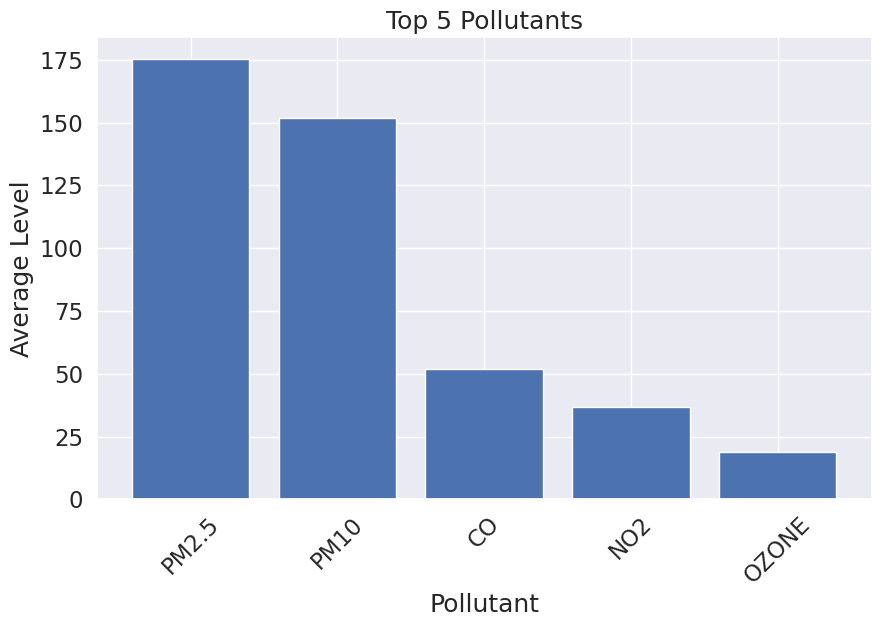

In [56]:
#Top Pollutants Bar Chart
# Group by pollutant ID and calculate mean pollution level
avg_pollutants = df.groupby('pollutant_id')['pollutant_avg'].mean()  # Replace 'pollutant_avg' with the actual column name

# Select top N pollutants
top_n = 5
top_pollutants = avg_pollutants.nlargest(top_n)

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_pollutants.index, top_pollutants.values)
plt.xlabel("Pollutant")
plt.ylabel("Average Level")
plt.title(f"Top {top_n} Pollutants")
plt.xticks(rotation=45)
plt.show()


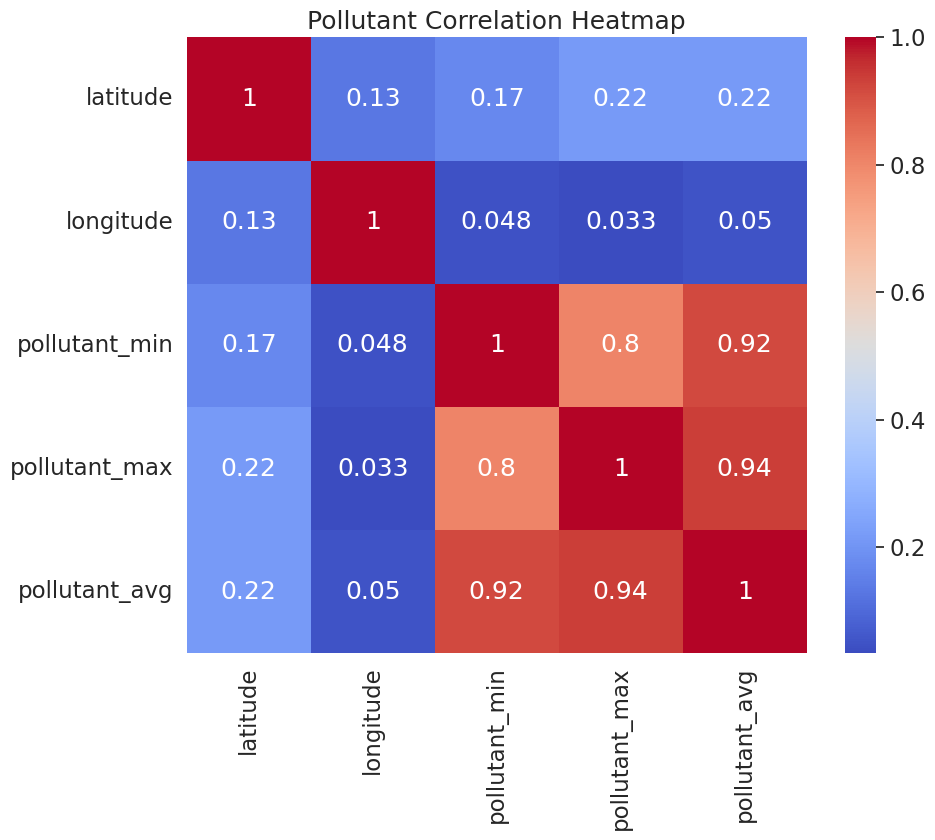

In [58]:
# Select only numeric columns
numerical_df = df.select_dtypes(include=['float', 'int'])

# Calculate correlation matrix
corr_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title("Pollutant Correlation Heatmap")
plt.show()